# Lab 07-2

## Mnist

In [16]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, 10])

Y_one_hot = tf.one_hot(tf.argmax(Y, axis=1), 10)
Y_one_hot = tf.reshape(Y_one_hot, [-1, 10])

W = tf.Variable(tf.random_normal([784, 10]), name='weight')
b = tf.Variable(tf.random_normal([10]), name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

prediction = tf.argmax(hypothesis, axis=1)
is_correct = tf.equal(prediction, tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

epochs = 15
batch_size = 100
num_iteartions = int(mnist.train.images.shape[0] / batch_size)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    total_cost = 0

    for i in range(num_iteartions):
        batch_x_data, batch_y_data = mnist.train.next_batch(batch_size)

        cost_val, _ = sess.run([cost, train], feed_dict={X: batch_x_data, Y: batch_y_data})

        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(total_cost / num_iteartions))

acc_val = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print("Accuracy: ", acc_val)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 9.441447540
Epoch: 0002 cost = 5.009973181
Epoch: 0003 cost = 3.458026828
Epoch: 0004 cost = 2.714311272
Epoch: 0005 cost = 2.276049848
Epoch: 0006 cost = 1.987544133
Epoch: 0007 cost = 1.783692045
Epoch: 0008 cost = 1.632074710
Epoch: 0009 cost = 1.515196727
Epoch: 0010 cost = 1.421854787
Epoch: 0011 cost = 1.345552731
Epoch: 0012 cost = 1.281787019
Epoch: 0013 cost = 1.227364286
Epoch: 0014 cost = 1.180427579
Epoch: 0015 cost = 1.139318869
Accuracy:  0.7873


### Sample image show and prediction

Label:  [8]
Prediction:  [2]


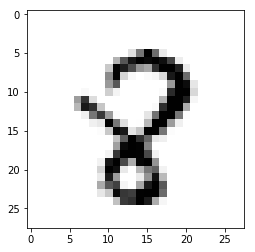

In [25]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples - 1)

print('Label: ', sess.run(tf.argmax(mnist.test.labels[r:r + 1], axis=1)))
print('Prediction: ', sess.run(prediction, feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()